In [212]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [213]:
from sklearn import datasets
from sklearn.cluster import KMeans

dataset = pd.read_csv("./heart-disease/heart.csv")
dataset.shape


(303, 14)

In [214]:
dataset[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [215]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1:]

In [216]:
model = KMeans(n_clusters=2)

model.fit(X)
predictions = model.predict(X)

predictions[predictions == 0] = 2
predictions[predictions == 1] = 0
predictions[predictions == 2] = 1

print(predictions)

[1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0
 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1]


In [217]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

print ("accuracy = ", metrics.accuracy_score(y_true=y, y_pred=predictions))
print ("precision = ", metrics.precision_score(y_true=y, y_pred=predictions))
print ("recall = ", metrics.recall_score(y_true=y, y_pred=predictions))
print ("f1 = ", metrics.f1_score(y_true=y, y_pred=predictions))


accuracy =  0.5775577557755776
precision =  0.5958549222797928
recall =  0.696969696969697
f1 =  0.6424581005586593


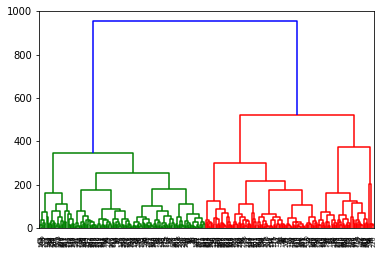

In [218]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
#dist = pdist(X, 'euclidean')

mergings = linkage(X, method='ward')


d = dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6)

plt.show()

In [219]:
from scipy.cluster.hierarchy import fcluster
fcluster(mergings, 5)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [220]:
from scipy.cluster.hierarchy import cut_tree
cuttree = cut_tree(mergings, n_clusters=[2])
cuttree[:10]

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]])

In [221]:
print ("accuracy = ", metrics.accuracy_score(y_true=y, y_pred=cuttree))
print ("precision = ", metrics.precision_score(y_true=y, y_pred=cuttree))
print ("recall = ", metrics.recall_score(y_true=y, y_pred=cuttree))
print ("f1 = ", metrics.f1_score(y_true=y, y_pred=cuttree))

accuracy =  0.5610561056105611
precision =  0.6066666666666667
recall =  0.5515151515151515
f1 =  0.5777777777777778
